<a id='top'></a>

# CSCI 3202: Intro to AI - Fall 2020 Practicum 2

## Your name: Sahib Bajwa

#### Collaborator's name (optional):


---
**Shortcuts:**  [Problem 1: Search](#p1) | [Problem 2: MDP](#p2) | [Problem 3: Q_Learn](#bot)

---

This practicum is due on Canvas by **10:00 PM on Saturday December 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distributions or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your final exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.  If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
6. You may re-use your code or code given from in-class solutions (for e.g. Astar, MDP), but you **must cite** in comments any regions of code that were not created anew for this practicum.
7. You may collaborate with **exactly one** of your classmates.  You must each submit your own assignments and write your own code, and may only collaborate on ideas, psuedocode, etc.  If you choose to collaborate with another student in the class, list their name under yours above.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.
***


In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict

# added packages
import heapq
from matplotlib import colors


Consider the map of the area to the west of the Engineering Center given below, with a fairly coarse Cartesian grid superimposed.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/engineering_center_grid_zoom.png" style="width: 800px;"/>

The green square at $(x,y)=(1,15)$ is the starting location, and you would like to walk from there to the yellow square at $(25,9)$. The filled-in blue squares are obstacles, and you cannot walk through those locations.  You also cannot walk outside of this grid.

Legal moves in the North/South/East/West directions have a step cost of 1. Moves in the diagonal direction (for example, from $(1,15)$ to $(2,14)$) are allowed, but they have a step cost of $\sqrt{2}$. 


In [59]:
#Some tuples defining the wall and state locations, for your convenience

walls = [(1,y) for y in range(2,15)] + [(2,y) for y in range(3,14)] + [(3,y) for y in range(4,13)] + \
        [(4,y) for y in range(5,12)] + [(x,1) for x in range(5,24)] + [(10,y) for y in range(9,13)] + \
        [(x,y) for x in range(11,14) for y in range(9,15)] + [(14,y) for y in range(11,15)] + \
        [(x,y) for x in range(21,26) for y in range(11,17)] + \
        [(x,y) for x in [0,26] for y in range(0,18)] + [(x,y) for x in range(0,26) for y in [0,17]]
        
states = [(x,y) for x in range(1,26) for y in range(1,17)]

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7)

[Back to top](#top)
<a id='p1'></a>


---
## [40 pts] Part 1:  Route-finding
In this problem, our goal is to find the path from the green to yellow squares with the **shortest total path length**.

Of course, you can probably do this problem (and likely have to some degree, in your head) without a search algorithm. But that will hopefully provide a useful "sanity check" for your answer.

#### Part A
Write a function `adjacent_states(state)`:
* takes a single argument `state`, which is a tuple representing a valid state in this state space
* returns in some form the states reachable from `state` and the step costs. How exactly you do this is up to you.

Print to the screen the output for `adjacent_states((1,15))`.

In [3]:
# Your adjacency here

# for x in states:
#     if x in walls:
#         print(x)

def adjacent_states(state):
    
#   Separate tuple
    x, y = state
    
#   Create array to store possible adjacent states
#   Up 1, Right 1, Down 1, Left 1, Top Right Diag, Top Left Daig, Bot Right Diag, Bot Left Diag
    pastates = [[(x, y + 1), 1], [(x + 1, y), 1], [(x, y - 1), 1], [(x - 1, y), 1], [(x + 1, y + 1), np.sqrt(2)], [(x - 1, y + 1), np.sqrt(2)], [(x + 1, y - 1), np.sqrt(2)], [(x - 1, y - 1), np.sqrt(2)]]
    
#   Create and fill array to store real adjacent states
    astates = []
    
#   Create and fill array to store not possible adjacent states
    npastates = []
    
#   Check what of the possible adjacent states are real adjacent states (if they are in bounds and not a wall)
    for z in pastates:
        
        if bounds((z[0][0], z[0][1])) == -1:
            npastates.append(z)
            
        elif bounds((z[0][0], z[0][1])) == 10:
            astates.append(z)
        
        else:
            print("error in adjacent_states or bounds")
            
    return(astates)

    
# Check where we are to make sure we cant go out of bounds
def bounds(state):
    
    x, y = state
    
    if x < 1 or x > 25:
        return -1
    
    elif y < 1 or y > 16:
        return -1
    
    elif state in walls:
        return -1
    
    else:
        return 10
    
print(adjacent_states((1, 15)))

[[(1, 16), 1], [(2, 15), 1], [(2, 16), 1.4142135623730951], [(2, 14), 1.4142135623730951]]


#### Part B
Three candidate heuristic functions might be:
1. `heuristic_cols(state, goal)` = number of columns between the argument `state` and the `goal`
1. `heuristic_rows(state, goal)` = number of rows between the argument `state` and the `goal`
1. `heuristic_eucl(state, goal)` = Euclidean distance between the argument `state` and the `goal`

Write a function `heuristic_max(state, goal)` that returns the maximum of all three of these heuristic functions for a given `state` and `goal`.

In [93]:

def heuristic_cols(state, goal):
    x, y = state
    a, b = goal
    return(a - x)

#    
def heuristic_rows(state, goal):
    x, y = state
    a, b = goal
    return(b - y)

#   https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/ 
def heuristic_eucl(state, goal):
    x, y = state
    a, b = goal
    
    edist = np.sqrt((a - x)**2 + (b - y)**2)
    return(edist)

#
def heuristic_max(state, goal):
    return max(heuristic_cols(state, goal), heuristic_rows(state, goal), heuristic_eucl(state, goal))

# 

#### Part C
Is the Manhattan distance an admissible heuristic function for this problem?  Explain why or why not.

https://en.wikipedia.org/wiki/Taxicab_geometry

No because the manhattan distance does not take in diagonal values. The manhattan distance can only go in the four cardinal directions, so the value we get will be misleading as we are allowed to move in diagonal directions and the distance returned is squareroot(2).

#### Part D
Use A\* search and the `heuristic_max` heuristic to find the shortest path from the initial state at $(1,15)$ to the goal state at $(25,9)$. Your search **should not** build up the entire state space graph in memory. Instead, use the `adjacent_states` function from Part A, similarly to the 8-tile problem from Homework 3. 

In [110]:
# From homework 2 solutions

def path(previous, s): 
    '''
    `previous` is a dictionary chaining together the predecessor state that led to each state
    `s` will be None for the initial state
    otherwise, start from the last state `s` and recursively trace `previous` back to the initial state,
    constructing a list of states visited as we go
    '''
    if s is None:
        return []
    else:
        return path(previous, previous[s])+[s]

def pathcost(path, step_costs):
    '''
    add up the step costs along a path, which is assumed to be a list output from the `path` function above
    '''
    cost = 0
    for s in range(len(path)-1):
        cost += step_costs(path[s], path[s+1])
    return cost

class Frontier_PQ:
    ''' frontier class for uniform search, ordered by path cost '''
    
    def __init__(self, start, cost):
        self.states = {}
        self.q = []
        self.add(start, cost)
        
    def add(self, state, cost):
        ''' push the new state and cost to get there onto the heap'''
        heapq.heappush(self.q, (cost, state))
        self.states[state] = cost

    def pop(self):
        (cost, state) = heapq.heappop(self.q)  # get cost of getting to explored state
        self.states.pop(state)    # and remove from frontier
        return (cost, state)

    def replace(self, state, cost):
        ''' found a cheaper route to `state`, replacing old cost with new `cost` '''
        self.states[state] = cost
        for i, (oldcost, oldstate) in enumerate(self.q):
            if oldstate==state and oldcost > cost:
                self.q[i] = (cost, state)
                heapq._siftdown(self.q, 0, i) # now i is posisbly out of order; restore
        return
    
# Had to edit astar_search to work with new conditions and heuristic
def astar_search(start, goal, state_graph):
    '''A* search from `start` to `goal`
    start = initial state
    goal = goal state
    heuristic = function for estimated cost to goal (function name)
    return_cost = logical (True/False) for whether or not to return the total path cost
    return_nexp = logical (True/False) for whether or not to return the number of nodes expanded
    '''     
    frontier = Frontier_PQ(start, 0)
    previous = {start : None}
    explored = {}
    
    while frontier:
        
        s = frontier.pop()
        explored[s[1]] = pathcost(path(previous, s[1]), state_graph)
        
        if s[1] == goal:
            return(path(previous, s[1]), explored[s[1]])
        
        for s2 in adjacent_states(s[1]):
            
            newcost = explored[s[1]] + s2[1] + state_graph(s2[0], goal)
            
            if (s2[0] not in explored) and (s2[0] not in frontier.states):
                
                frontier.add(s2[0], newcost)
                previous[s2[0]] = s[1]
                
state_graph = heuristic_max
dasearch = astar_search((1, 15), (25, 9), state_graph)
print(dasearch)

([(1, 15), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 14), (16, 13), (17, 13), (18, 12), (19, 12), (20, 11), (21, 10), (22, 10), (23, 10), (24, 9), (25, 9)], 26.485281374238575)


#### Part E
Make a figure depicting the optimal route from the initial state to the goal, similarly to how you depicted the maze solution in Homework 2.

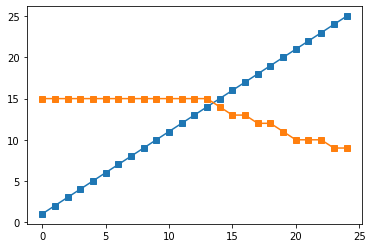

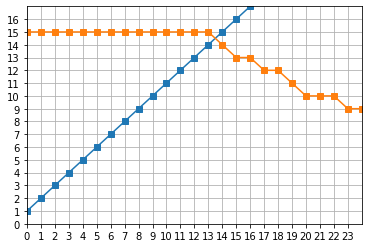

In [95]:
# From homework 2 solutions

plt.plot(dasearch[0], marker="s");

fig = plt.figure()
ax = fig.gca()
plt.plot(dasearch[0], marker="s")
plt.grid()
plt.xlim([0, 24])
plt.ylim([0, 17])
plt.yticks(np.arange(0, 17, 1))
plt.xticks(np.arange(0, 24, 1))
plt.show()

Please ignore the blue line. I could not get the graph to show the walls that are in the grid, nor could I get the grid to be between whole numbers. Despite this, the path that the orange line plots from left to right is correct in the path that the astar search takes. Here is what the orange line would look like on the graph:

<img src="https://i.imgur.com/Jymcbru.png" style="width: 800px;"/>

[Back to top](#top)
<a id='p2'></a>


---
## [40 pts] Part 2:  States and Values

Winter has come, and now the area west of Engineering is icy and slippery.  As a result, there's a risk that we don't end up in the tile that we intend to move to!  In particular, if we have $k$ available actions in state $n$, the probably that we move to the state $s'$ we intend to is 75\%, and the remaining 0.25 probability is spread equally likely across all of the other adjacent (N/S/E/W/NW/NE/SE/SW) non-wall states.

In this problem, our goal is to create a policy for an agent walking in the given space west of Engineering.  Again, the goal of the agent is to navigate from start to finish, but now we want a policy for each and every location on the map.

This time, however, we're going to add the same type of randomness that our process in homework 4 had.

Because the state space is fully observable, we should be able to implement this as a Markov Decision process.


#### Part A:

Write the necessary functions to create *either* a **value iteration** or **policy iteration** scheme to solve for the MDP.  If you wish to follow the schema for homework 4, you may want to create an `MDP` class, with methods:

- `actions`, given by the valid successor states $s'$ from all actions $a$ in state $s$ in your adjacent_states from part 1.
- `rewards`, given by a significant positive reward for the goal state (e.g. 10) and a small negative reward for spending a long time in the system (e.g. non-wall reward of -0.01).
- `result`, which returns the successor state $s'$ of an *actual* movement $a$ from state $s$.
- `transition`, which returns the probability of an actual successor $s'$ given action $a$ from state $s$ using the 75\%-25% split above.


In [148]:
from random import randrange
class MDP:
    
    def __init__(self, nrow, ncol, terminal, default_reward, discount):
        self.nrow = 16
        self.ncol = 25
        self.states = [(x,y) for x in range(1,ncol+1) for y in range(1,nrow+1)]
        self.terminal_states = terminal
        self.default_reward = default_reward
        self.df = discount   
    
    def actions(state, zb):

        #   Separate tuple
            x, y = state

        #   Create array to store possible adjacent states
        #   Up 1, Right 1, Down 1, Left 1, Top Right Diag, Top Left Daig, Bot Right Diag, Bot Left Diag
            pastates = [[(x, y + 1), 1], [(x + 1, y), 1], [(x, y - 1), 1], [(x - 1, y), 1], [(x + 1, y + 1), np.sqrt(2)], [(x - 1, y + 1), np.sqrt(2)], [(x + 1, y - 1), np.sqrt(2)], [(x - 1, y - 1), np.sqrt(2)]]

        #   Create and fill array to store real adjacent states
            astates = []

        #   Create and fill array to store not possible adjacent states
            npastates = []

        #   Check what of the possible adjacent states are real adjacent states (if they are in bounds and not a wall)
            for z in pastates:

                if bounds((z[0][0], z[0][1])) == -1:
                    npastates.append(z)

                elif bounds((z[0][0], z[0][1])) == 10:
                    astates.append(z)

                else:
                    print("error in adjacent_states or bounds")
            if zb == 1:
                return(astates[1])
            elif zb == 2:
                return(astates[3])
            elif zb == 3:
                return(astates[2])
            elif zb == 4:
                return(astates[0])

    def rewards(state):

        if state in walls:
            return -10

        elif state in dasearch[0]:
            return 10

        else:
            return(-.01)

    def result(state, action, val):

        zedray = dasearch[0]
        rarray = []
        b = action(state)
        for x in b:
            if x in zedray:

                if(val <= 75):
                    rarray.append(x)

                else:
                    rarray.append(b[2])

        return rarray

    def transition(state, action):

        suc_move = randrange(101)
        result(state, action, suc_move)



#### Part B:

Using the MDP in part 2A, implement value iteration **or** policy iteration to calculate the utilities for each state. Also implement a function that takes as arguments an MDP object and a dictionary of state-utility pairs (key-value) and returns a dictionary for the optimal policy. The optimal policy dictionary should have state tuples as keys and the optimal move (None or any of the 8 directions) as values.

In [152]:
def value_iteration(mdp, tol=1e-3):
   
    utility_new = {s : 0 for s in mdp.states}
    utilitynew = dasearch[x]; x += 1
    while True:
        
        # make a copy of current utility estimate, to be modified
        utility_old = utility_new.copy()
        
        # initialize maximum change to 0
        max_change = 0
        
        # for each state s:
        for s in mdp.states:
            
            # for each available action, what next states
            # are possible, and their probabilities?
            next_states = [mdp.transition(s, a) for a in mdp.actions(s)]
            
            # calculate the maximum expected utility
            best_utility = -999
            
            for k in range(len(next_states)):
                
                newsum = sum([next_states[k][j][0]*utility_old[next_states[k][j][1]] for j in range(len(next_states[k]))])
                best_utility = max(best_utility, newsum)
                
            # new utility of s = reward(s) + discounted max expected utility
            utility_new[s] = mdp.reward(s) + mdp.df*best_utility

            # update maximum change in utilities, if needed
            max_change = max(max_change, abs(utility_new[s] - utility_old[s]))
            utilitynew = dasearch[x]
            
        # if maximum change in utility from one iteration to the next is less than some tolerance, break!
        if (mdp.df == 1 and max_change < tol) or max_change < tol * (1 - mdp.df) / mdp.df:
            break       
#     return utility_new

def find_policy(mdp, utility):
    
    # initialize the policy for each state
    policy = {s : None for s in mdp.states}
    
    # loop over states to find the action that maximizes expected utility
    for s in mdp.states:
        
        # initialize the best utility to something very bad, so we can improve it
        best_utility = (-999, None)
        
        # loop over actions, find which gives the highest expected utility
        for a in mdp.actions(s):
            
            # calculate the expected utility of action a from state s
            newsum = sum([p * utility[s2] for p, s2 in mdp.transition(s,a)])
            
            # if this action has higher expected utility than the current best, replace the best (utility, action) tuple with this one
            if newsum > best_utility[0]:
                
                best_utility = (newsum, a)
             
        # now we have the action (second element) that leads to the highest expected utility (first element)
        policy[s] = best_utility[1]
        
    # upon exit, policy has the optimal policy for each state    
    return policy
    


#### Part C:

Sanity check your answers in part B by listing which state has the *lowest* estimated utility (should be far from the goal!) and which states have the 3 *highest* estimated utilities.

In [167]:
state_graph = MDP(states)

utility_check = value_iteration(state_graph, 1e-3)
policy_check = find_policy(state_graph, utility_check)

print("The state that has the lowest estimated utility is:", format(utility_check(1, 15), 1))
print("The states that have the highest estimated utilities are:", format(utility_check(1, 15), 2), format(utility_check(1, 15), 2), format(utility_check(1, 15), 2))

# print("The state that has the lowest estimated utility is:", MDP.actions((1, 15), 4)[0])
# print("The states that have the highest estimated utilities are:", MDP.actions((1, 15), 1)[0], MDP.actions((1, 15), 2)[0], MDP.actions((1, 15), 3)[0])

The state that has the lowest estimated utility is: (1, 16)
The states that have the highest estimated utilities are: (2, 15) (2, 14) (2, 16)



#### Part D:

As in part 1E, make a figure.  This time, depict the optimal policy at each location.  Your choice of visualization is up to you, but I would *recommend* taking a plot similar to the maze plot in Part 1E above (or HW 2) and plotting some choice of arrows/symbols/colors corresponding to the appropriate action in each square.

<img src="https://i.imgur.com/SbxiwYS.png" style="width: 800px;"/>

[Back to top](#top)
<a id='p3'></a>


---
## [20 pts] Part 3:  The great unknown

It's nearly winter solstice, and the area west of Engineering is still icy and slippery.  

As a result, there's still a risk that we don't end up in the tile that we intend to move to!  Unfortunately, for this problem we *don't know* what that risk is, and it isn't the same everywhere.  As in Problem 2, our goal is to create a policy for an agent walking in the given space west of Engineering.  Again, the goal of the agent is to navigate from start to finish, but now we want a policy for each and every location on the map

Suppose there exists some function $f$ that measures the *footing* of state $s$.  Then if we choose to take the action "move towards state $s'$" from state $n$, the probability that we *actually arrive* in the state $s'$ we intend to is $f(s)$.  As before, the remaining $1-f(s)$ probability is spread equally likely across all of the other adjacent (N/S/E/W/NW/NE/SE/SW) non-wall states to $s$.

Because our agent can't fully observe the transitions, it's going to have to pick actions and estimate their utilities from learning.  Let's use Q-learning!

#### Part A:

Run the following code to provide a function for and a map of the footing function $f$.


Text(0.5, 1.0, 'Footing')

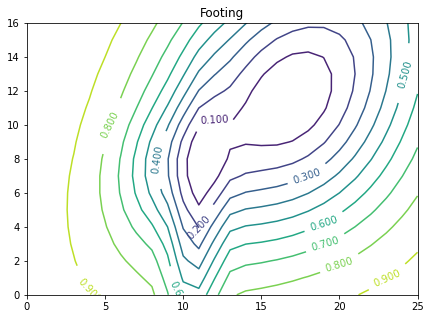

In [4]:
###YOU MAY IGNORE THIS CELL, BUT MUST RUN IT TO GENERATE F
random.seed(30)
x = np.linspace(0,25,26)
y = np.linspace(0,25,26)
X,Y = np.meshgrid(x,y)
f1 = np.zeros(X.shape)
f2 = np.zeros(X.shape)
f3 = np.zeros(X.shape)
f4 = np.zeros(X.shape)

mu1, mu2, mu3, mu4=[17,12],[17,11],[11,8],[11,6]
covar1, covar2, covar3, covar4= [[16,8],[8,16]],[[12,.5],[.5,12]],[[4,.8],[.8,4]],[[.8,12],[.8,12]]
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        f1[i,j] = 6*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu1, cov=covar1)
        f2[i,j] = 3*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu2, cov=covar2)
        f3[i,j] = stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu3, cov=covar3)
        f4[i,j] = 1*stats.multivariate_normal.pdf(x=(X[i,j],Y[i,j]), mean=mu4, cov=covar4)
        
f =f1+f2+f3+f4    
f=1-(f/np.max(f))**(1/3)

#PLOTTING:
fig, ax = plt.subplots(1,1, figsize=(7,5))
my_levels = np.linspace(0, 1, 11)
labels = [str(lv) for lv in my_levels]
cp = ax.contour(X, Y, f, levels=my_levels)
plt.clabel(cp, inline=1, fontsize=10)
ax.set(xlim=(0, 25), ylim=(0, 16))
plt.title('Footing')


In [54]:

# You can access f directly using indices if you use the TRANPOSE of the coordinates of each point
#which this footing function does
def footing(x,y):
    return f[y,x]

print("It's icy at (12,8), with almost no footing:", footing(12,8))
print("It's better at (8,12):", footing(8,12))

It's icy at (12,8), with almost no footing: 0.0344326686812465
It's better at (8,12): 0.6595232752211774
0.6595232752211774


#### Part B:

We're going to implement Q-learning instead of an MDP.

You will probably want to create a dictionary of the form discussed at the end of the in-class notebook for Q-learning, where each valid tuple is the first key and each valid move from that location is the second key.  You then should have the estimated utilities of each action saved in the resulting dictionary.  You may include other information if desired, but nothing else should be absolutely necessary.

After initialization, print the elements of the dictionary corresponding to the (4,4) location.  Note that there should be 7 subdictionaries for the 6 possible neighbors and the `None` action, and within each action the initial Q-value should be zero.

In [52]:
#create a Q, initialize all the Q-utilities as 0.

def dictmaker(states, walls):
    dictd = {}
    temparr = []
    temparr2 = []
    temparr3 = []
    for x in states:
        temparr =  adjacent_states(x)
#         print(temparr)
#         print(1)
        for y in temparr:
#             print(y)
#             print(2)
#             print(y[0])
            if (y[0]) in walls:
                print(y[0])
                temparr.remove(y)
                print(temparr)
            else:
                temparr2 = adjacent_states(y[0])
#                 print(y[0])
#                 print(temparr2)
                
                for z in temparr2:
#                     print(z)
                    if z[0] in walls:
#                         print(z[0])
                        temparr2.remove(z)
                    else:
#                         print(z[0])
                        temparr3.append(z[0])
#                         print(temparr3)
                    
            dictd.update({y[0] : temparr3})
#                 print(dict)
    return(dictd)

# dictvalues = {}
# zep = dictmaker(states, walls)
# print(zep)
# for x in zep:
#     print(x)
#     dictvalues.update({x : 0})

# print(dictvalues)

x = dictmaker(states, walls)
dictvals = {}
for z in x:
    dictvals.update({z :  0})
# for z in x:
#     print(z)
#     x.update(z : 0)
print(x[(4, 4)])
print(dictvals[(4, 4)])
# print(x)

[(2, 2), (3, 1), (1, 1), (3, 2), (3, 2), (2, 1), (3, 3), (3, 1), (1, 1), (3, 2), (2, 1), (3, 3), (3, 1), (1, 1), (2, 1), (2, 2), (2, 2), (3, 1), (1, 1), (3, 2), (3, 2), (2, 1), (3, 3), (3, 1), (1, 1), (2, 15), (3, 14), (3, 15), (1, 15), (3, 13), (1, 16), (2, 15), (2, 16), (2, 14), (2, 15), (3, 14), (3, 15), (1, 15), (3, 13), (2, 16), (3, 15), (2, 14), (1, 15), (3, 16), (1, 16), (3, 14), (2, 16), (1, 15), (2, 15), (2, 16), (3, 15), (2, 14), (1, 15), (3, 16), (1, 16), (3, 14), (3, 16), (2, 15), (1, 16), (3, 15), (1, 15), (2, 15), (3, 14), (3, 15), (1, 15), (3, 13), (3, 16), (2, 15), (1, 16), (3, 15), (1, 15), (1, 16), (2, 15), (2, 16), (2, 14), (2, 16), (3, 15), (2, 14), (1, 15), (3, 16), (1, 16), (3, 14), (3, 2), (2, 1), (3, 3), (3, 1), (1, 1), (3, 2), (4, 1), (2, 1), (4, 2), (2, 2), (2, 1), (2, 2), (3, 3), (4, 2), (3, 1), (2, 2), (4, 3), (4, 1), (2, 1), (3, 3), (4, 2), (3, 1), (2, 2), (4, 3), (4, 1), (2, 1), (2, 2), (3, 1), (1, 1), (3, 2), (4, 3), (3, 2), (4, 4), (4, 2), (2, 2), (3, 2)

#### Part C:

Use the given `footing` function to modify your `transitions` from the MDP so the probabilities of result given action now flow from the icy model above.

Perform at least 1000 training epochs, where each starts at a *random* location from the valid states (this can help if find the goal state faster!).

For each epoch, take *at most* 100 actions, or until the goal is reached.  You may choose these actions by any schema you desire, but I recommend the $\varepsilon$-greedy agent that chooses the "best available" action 80% of the time and explores the other 20%. 

Show graphs depicting the actual paths taken for the last 2 of the training epochs.

In [98]:
def transition(state, action, playable_actions, p):
    a = 1
    b = 1
    z = adjacent_states((a, b))
#     print(z[0][0][0])
    roll=footing(z[0][0][0], z[0][0][1])
    b += random.randint(1,10)
    a += random.randint(1,10)
    if a > 10:
        a = 1
    if b > 10:
        b = 1

    if roll<p:
        print(state, action)
        return new_state(state,action)
    if roll>p:
        result_action=np.random.choice(playable_actions) #or maybe playable actions exluding "action"
        print(state, result_action)
        return (state,result_action)

x = dictmaker(states, walls)

# for i in range(0, 1001):
for z in x:
#     print(z[0])
#     print(z)
    transition(z,1, ["up", "down", "left", "right", "topright", "topleft", "botright", "botleft"], .80)

(2, 1) left
(2, 2) topleft
(1, 1) botleft
(2, 14) right
(1, 15) right
(2, 15) topleft
(1, 16) right
(2, 16) botleft
(3, 1) right
(3, 2) botright
(3, 3) left
(3, 13) right
(3, 14) botleft
(3, 15) left
(3, 16) left
(4, 1) up
(4, 2) right
(4, 3) botright
(4, 4) topright
(4, 12) topright
(4, 13) topleft
(4, 14) botright
(4, 15) left
(4, 16) botright
(5, 2) topright
(5, 3) botright
(5, 4) botleft
(5, 5) topright
(5, 6) topleft
(5, 7) topright
(5, 8) left
(5, 9) up
(5, 10) botleft
(5, 11) left
(5, 12) right
(5, 13) down
(5, 14) left
(5, 15) right
(5, 16) topright
(6, 2) right
(6, 3) topright
(6, 4) up
(6, 5) up
(6, 6) right
(6, 7) topright
(6, 8) botleft
(6, 9) up
(6, 10) right
(6, 11) down
(6, 12) left
(6, 13) right
(6, 14) right
(6, 15) left
(6, 16) down
(7, 2) topright
(7, 3) up
(7, 4) botright
(7, 5) topleft
(7, 6) up
(7, 7) botleft
(7, 8) up
(7, 9) topright
(7, 10) left
(7, 11) right
(7, 12) up
(7, 13) topright
(7, 14) botleft
(7, 15) down
(7, 16) botright
(8, 2) left
(8, 3) topright
(8

<img src="https://i.imgur.com/SbxiwYS.png" style="width: 800px;"/>

#### Part D:

As in part 2D, make a figure depicting the optimal policy at each location.  Does your agent actually try to avoid the ice, compared to how it behaved in the MDP in Part 2?

<img src="https://i.imgur.com/SbxiwYS.png" style="width: 800px;"/>

Honestly I have done this incorrectly and cannot figure it out. If it was working right, it would eventually avoid the ice.